# Preprocessing Data
## Import Dependencies

In [1]:
import numpy as np
import os
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer

# Tokenization and Cleaning
Below we tokenize the articles using some of the nltk libraries.

In [4]:
stop_words = set(stopwords.words('english'))

def split_data(lines): 
    """splits the summary from the body and names the body lines"""
    flag = False
    for i in range(len(lines)):
        if lines[i][0] == '\n':
            summary = lines[:i]
            line = lines[i:]
            flag = True
    if flag is False:
        summary, line = None, None
    return summary, line
        

def split_string(lines):
    sent_tokens = []
    for line in lines:
        line = re.sub("\n", "", line)
        line = re.sub("\\\\.", "", line)
        line = re.sub("===", "", line)
        for sent in sent_tokenize(line):
            sent_tokens.append(sent)
    return sent_tokens

def split_summary(lines):
    sent_tokens = ["_START_"]
    for line in lines:
        line = re.sub("\n", "", line)
        line = re.sub("\\\\.", "", line)
        line = re.sub("===", "", line)
        line = " ".join(["_START_", line, "_END_"])
        for sent in sent_tokenize(line):
            sent_tokens.append(sent)
    sent_tokens.append("_END_")
    return sent_tokens



In [19]:
def one_hot_enc(ar, dic_size):
    #print(ar)
    n = np.max(ar) +1
    i = np.sum(np.eye(dic_size)[ar], axis= 0)
    bl = np.array(i, dtype=bool)
    oh = bl.astype(int)
    #padded = pad_sequences(oh, maxlen=x_voc_size, padding='post', truncating='post')
    return oh

def one_hot_all(x_train, dic_size):
    #print(len(x_train))
    #print(len(x_train[0]))
    #print(x_train[0])
    trains_oh = []
    for each in x_train:
        trains_oh.append(one_hot_enc(each, dic_size))
    return trains_oh

## We find the most suitable maximal length in this article 
We do this to not have to not have an overly large dataset.

Abdon_Atangana.txt
Abel_equation.txt
Abelian_group.txt
Abelian_variety.txt
Abelian_von_Neumann_algebra.txt
Abraham_Robinson.txt
Absolute_geometry.txt
Abstract_algebra.txt
Abstract_algebraic_logic.txt
Abstract_analytic_number_theory.txt
[11639, 1021, 8208, 1968, 1890, 436, 539, 1280, 678, 1656]
[1, 1, 9, 95, 28, 22, 13, 13, 10, 51]
(10,) 10


<ipython-input-13-31071d9c76b9>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(text_overall).shape, len(summary_overall))


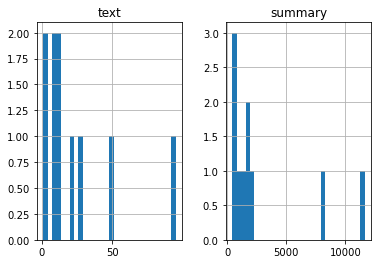

In [13]:



directory= '../../data'
## We find the most suitable maximal length in this article 
text_overall, summary_overall, title_overall = [], [], [] 
text_count, summary_count = [], []
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
#word tokenization + eliminating stopwords + words stemming + eliminating short words
def clean(string):
    word_tokens = word_tokenize(string)
    filtered_sentence = [ps.stem(w) for w in word_tokens if (not w in stop_words) and (len(w)>3)]
    return filtered_sentence 

for filename in os.listdir(directory):
    with open(directory+'/'+filename) as f:
        print(filename)
        lines = f.readlines()
        f.close()

        title = filename[:-4]
        summary, lines = split_data(lines)
        if lines is None:
            continue
        summary, lines = split_summary(summary), split_string(lines)

        clean_text = []
        tex_count = 0
        for line in lines:
            temp = clean(line)
            if temp != []:
                tex_count += (len(temp))
                for t in temp:
                    clean_text.append(t)  
        text_overall.append(clean_text)
        text_count.append(tex_count)

        clean_summary = []
        sum_count = 0
        for line in summary:
            temp = clean(line)
            if temp != []:
                sum_count+= (len(temp))
                for t in temp:
                    clean_summary.append(t)
        summary_overall.append(clean_summary)
        summary_count.append(sum_count)   

        title_overall.append(title)  
        
        
print(summary_count[:10])
print(text_count[:10])
print(np.array(text_overall).shape, len(summary_overall))
overview = pd.DataFrame({'text':text_count, 'summary':summary_count})
overview.hist(bins=30)
plt.show()


        


## Store sentence vectors:
We store a matrix of sentence vectors where each sentence is a vector and within each index stores the and index in the dictionary corresponding to the word.
The end of the sequences are padded with 0's.

In [21]:
max_text_len = 20000
max_summary_len = 200
x_train, x_test, y_train, y_test = train_test_split(text_overall, summary_overall, test_size=0.1, shuffle=True)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

#x_train = pad_sequences(x_train, maxlen=max_text_len, padding='post', truncating='post')
#x_test = pad_sequences(x_train, maxlen=max_text_len, padding='post', truncating='post')

#print(x_train[:10])
x_voc_size = len(tokenizer.word_index)+1
print(x_voc_size)

y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(y_train)

y_train = y_tokenizer.texts_to_sequences(y_train)
y_test = y_tokenizer.texts_to_sequences(y_test)

#y_train = pad_sequences(y_train, maxlen=max_summary_len, padding='post', truncating='post')
#y_test = pad_sequences(y_train, maxlen=max_summary_len, padding='post', truncating='post')

#print(y_train[:10])
y_voc_size = len(y_tokenizer.word_index)+1
print(y_voc_size)

134
1797


In [15]:
tokenizer.word_index

{'mathemat': 1,
 'isbn': 2,
 'abelian': 3,
 'theori': 4,
 'encyclopedia': 5,
 'extern': 6,
 'link': 7,
 '2001': 8,
 'varieti': 9,
 'refer': 10,
 'algebra': 11,
 'press': 12,
 '1994': 13,
 '1990': 14,
 'number': 15,
 'springer-verlag': 16,
 'publish': 17,
 'edit': 18,
 'logic': 19,
 'abstract': 20,
 'univers': 21,
 'complex': 22,
 'york': 23,
 'institut': 24,
 'studi': 25,
 'provid': 26,
 'american': 27,
 'societi': 28,
 'curv': 29,
 'oxford': 30,
 'absolut': 31,
 'geometri': 32,
 'dixmier': 33,
 'algèbr': 34,
 "d'opérateur": 35,
 'dan': 36,
 "l'espac": 37,
 'hilbertien': 38,
 'gauthier-villar': 39,
 '1969.': 40,
 'chapter': 41,
 'section': 42,
 'masamichi': 43,
 'takesaki': 44,
 'oper': 45,
 'scienc': 46,
 '2001–2003': 47,
 'first': 48,
 'volum': 49,
 '1979': 50,
 '3-540-42248-x': 51,
 'group': 52,
 'stanford': 53,
 'philosophi': 54,
 'proposit': 55,
 'ramon': 56,
 'jansana': 57,
 'charl': 58,
 'pinter': 59,
 '1982': 60,
 'book': 61,
 'second': 62,
 'maryland': 63,
 'sourc': 64,
 'birk

In [16]:
y_tokenizer.word_index

{'_start_': 1,
 '_end_': 2,
 'isplaystyl': 3,
 'group': 4,
 'abelian': 5,
 'algebra': 6,
 'ight': 7,
 'lpha': 8,
 'varieti': 9,
 'gener': 10,
 'theori': 11,
 'finit': 12,
 'number': 13,
 'theorem': 14,
 'function': 15,
 'geometri': 16,
 'athbb': 17,
 'logic': 18,
 'field': 19,
 'oper': 20,
 'tight': 21,
 'element': 22,
 'form': 23,
 'abstract': 24,
 'equat': 25,
 'order': 26,
 'mathemat': 27,
 'defin': 28,
 'isomorph': 29,
 'space': 30,
 'integ': 31,
 'follow': 32,
 'also': 33,
 'deriv': 34,
 'system': 35,
 'exampl': 36,
 'integr': 37,
 'studi': 38,
 'use': 39,
 'structur': 40,
 'case': 41,
 'direct': 42,
 'addit': 43,
 'complex': 44,
 'array': 45,
 'everi': 46,
 'properti': 47,
 '1-lpha': 48,
 'commut': 49,
 'result': 50,
 'ring': 51,
 'axiom': 52,
 'feft': 53,
 'measur': 54,
 'given': 55,
 'call': 56,
 'prime': 57,
 'isbn': 58,
 'fraction': 59,
 'subgroup': 60,
 'class': 61,
 'neumann': 62,
 'point': 63,
 'associ': 64,
 'cyclic': 65,
 'dimens': 66,
 'infinit': 67,
 'line': 68,
 'abso

In [23]:
x_train_oh= one_hot_all(x_train, x_voc_size)
y_train_oh = one_hot_all(y_train, y_voc_size)
x_test_oh= one_hot_all(x_train, x_voc_size)
y_test_oh = one_hot_all(y_train, y_voc_size)

In [25]:
x_train_oh[0]

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

## Save the preprocessed data to file

In [16]:
np.savez('preprocessed', x_train=x_train, x_test=x_test, y_train=y_train,y_test=y_test, 
                             max_text_len=max_text_len, max_summary_len=max_summary_len, x_voc_size=x_voc_size, y_voc_size=y_voc_size)